In [1]:
# pip install keras
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels=[]
train_samples=[]

### Dummy Dataset

In [3]:
for i in range(50):
#       younger people who experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) 
    
#      older people who did not experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    #       younger people who did not experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    
    #      older people who did experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# convert this data into np arra to pass in fit function
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [5]:
# reshape data into 2D because fit function does not accept 1D
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam

#for training
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Building Sequential Model

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Compiling model

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6635 - accuracy: 0.5519 - 597ms/epoch - 3ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6237 - accuracy: 0.6805 - 214ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.5794 - accuracy: 0.7610 - 215ms/epoch - 1ms/step
Epoch 4/30
210/210 - 0s - loss: 0.5371 - accuracy: 0.8010 - 220ms/epoch - 1ms/step
Epoch 5/30
210/210 - 0s - loss: 0.4955 - accuracy: 0.8286 - 263ms/epoch - 1ms/step
Epoch 6/30
210/210 - 0s - loss: 0.4569 - accuracy: 0.8510 - 220ms/epoch - 1ms/step
Epoch 7/30
210/210 - 0s - loss: 0.4223 - accuracy: 0.8729 - 231ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.3929 - accuracy: 0.8824 - 246ms/epoch - 1ms/step
Epoch 9/30
210/210 - 0s - loss: 0.3684 - accuracy: 0.8933 - 268ms/epoch - 1ms/step
Epoch 10/30
210/210 - 0s - loss: 0.3487 - accuracy: 0.9005 - 197ms/epoch - 936us/step
Epoch 11/30
210/210 - 0s - loss: 0.3328 - accuracy: 0.9052 - 195ms/epoch - 926us/step
Epoch 12/30
210/210 - 0s - loss: 0.3200 - accuracy: 0.9062 - 209ms/epoch - 993us/

### Creating a Validation Set using Keras

In [13]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.2512 - accuracy: 0.9429 - val_loss: 0.3436 - val_accuracy: 0.9000 - 387ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2502 - accuracy: 0.9413 - val_loss: 0.3430 - val_accuracy: 0.9190 - 268ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2495 - accuracy: 0.9429 - val_loss: 0.3434 - val_accuracy: 0.9000 - 220ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2488 - accuracy: 0.9418 - val_loss: 0.3427 - val_accuracy: 0.9190 - 271ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2479 - accuracy: 0.9466 - val_loss: 0.3429 - val_accuracy: 0.9190 - 280ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2474 - accuracy: 0.9439 - val_loss: 0.3425 - val_accuracy: 0.9190 - 225ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2468 - accuracy: 0.9460 - val_loss: 0.3428 - val_accuracy: 0.9000 - 238ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2463 - accuracy: 0.9439 - val_loss: 0.3418 - val_accuracy: 0.9190 - 231ms/epoch - 1ms/step


### Test Set

In [14]:
test_lables=[]
test_samples=[]

In [15]:
for i in range(10):
    #     younger individuals who did experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(1)
    
      #     older individuals who did not experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(0)
    
for i in range(200):
    #     younger individuals who did not experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(0)
    
      #     older individuals who did experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(1)

In [16]:
### Convert the data in np_arra formate
test_lables=np.array(test_lables)
test_samples=np.array(test_samples)

# Shuffle 
test_lables, test_samples = shuffle(test_lables, test_samples)

# tranform to 2D 
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


In [17]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [18]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)

In [21]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
# providing labels to confusion matrix
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


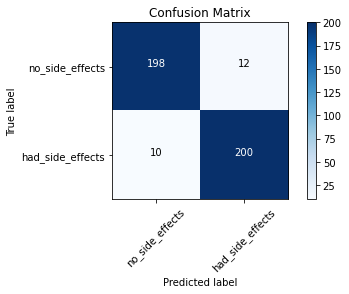

In [23]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving Model

In [25]:
# save model- was also an option to save the entire model
# but
# to save only archi use to_json() no weights or other configs
# we can use to_yaml() or to
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [26]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [27]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
